# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages dop Python.

**Imports**

In [1]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

**Ler Dados**

In [2]:
file_name = 'data.csv'
data = pd.read_csv(file_name)
data['Program'] = data[' Program'].map(lambda x: x.replace(" ",""))
data['CPU'] = data[' Core(s)']
data['PKG'] = data[' Package']
data['Time'] = data[' Time (ms)']
data.drop([' Program', ' GPU', ' DRAM', ' Core(s)', ' Package', ' Time (ms)',' Temperature',' Memory'],axis=1,inplace=True)
data.columns

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')

**Agrupar Dados**

In [3]:
data["Label"] = data["Program"] + " " + data["Language"] + " " + data[' PowerLimit'].map(lambda x: str(x))
data.drop(["Program","Language",' PowerLimit'],axis=1,inplace=True)
data

,CPU,PKG,Time,Label
0,1.983826,2.389099,183,Pyperformance_5 Python_3.9.18 -1
1,2.023987,2.406921,181,Pyperformance_5 Python_3.9.18 -1
2,2.033142,2.421509,182,Pyperformance_5 Python_3.9.18 -1
3,2.057556,2.454590,183,Pyperformance_5 Python_3.9.18 -1
4,2.017334,2.409424,181,Pyperformance_5 Python_3.9.18 -1
...,...,...,...,...
234,0.899658,1.600220,321,Pyperformance_31 Python_3.6.13 5
235,0.955872,1.698364,341,Pyperformance_31 Python_3.6.13 5
236,0.906738,1.610474,324,Pyperformance_31 Python_3.6.13 5
237,0.909729,1.615051,324,Pyperformance_31 Python_3.6.13 5


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f607d7a2a70>
Traceback (most recent call last):
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function

KMeans(n_clusters=6, n_init='auto', random_state=0)


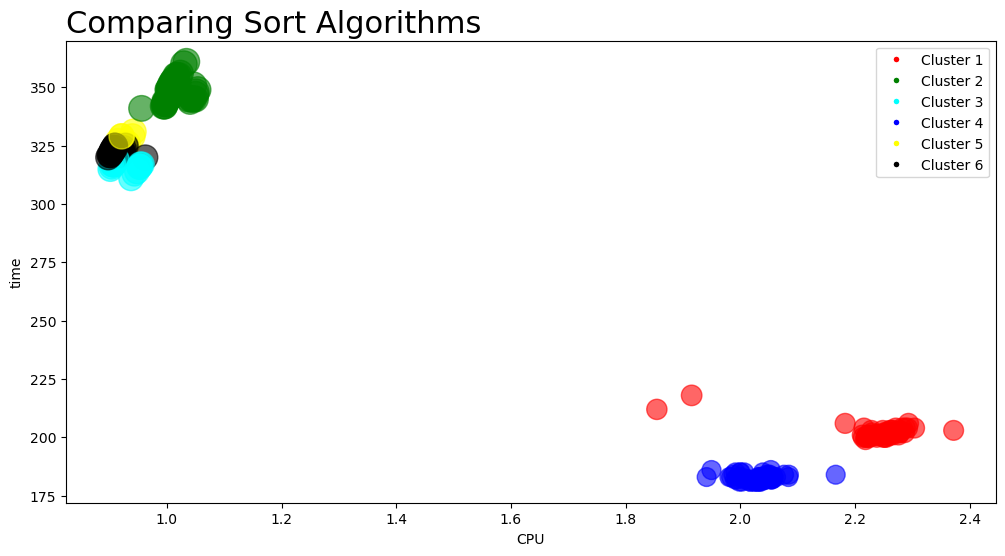

In [9]:
def k_means(clusters):
    df = data.drop(["Label"],axis=1).copy()
    kmeans = KMeans(n_clusters=clusters, random_state=0,n_init='auto')

    df['cluster'] = kmeans.fit_predict(df)
    print(kmeans)

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({i:cen_x[i] for i in range(clusters)})
    df['cen_y'] = df.cluster.map({i:cen_y[i] for i in range(clusters)})

    #define and map colors
    #colors = ['#DF2020', '#81DF20', '#2095DF']
    colors=['red','green','cyan','blue','yellow', 'black']
    df['c'] = df.cluster.map({i:colors[i] for i in range(clusters)})

    plt.figure(figsize=(12,6))
    plt.scatter(df.CPU, df.Time, c=df.c, s=df.Time, alpha = 0.6)

    # create a list of legend elem
    ## markers / records
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) 
    for i, mcolor in enumerate(colors)]

    # plot legend
    plt.legend(handles=legend_elements, loc='upper right')

    # title and labels
    plt.title('Comparing Sort Algorithms', loc='left', fontsize=22)
    plt.xlabel('CPU')
    plt.ylabel('time')
    
k_means(6)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f608c14e440>
Traceback (most recent call last):
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function

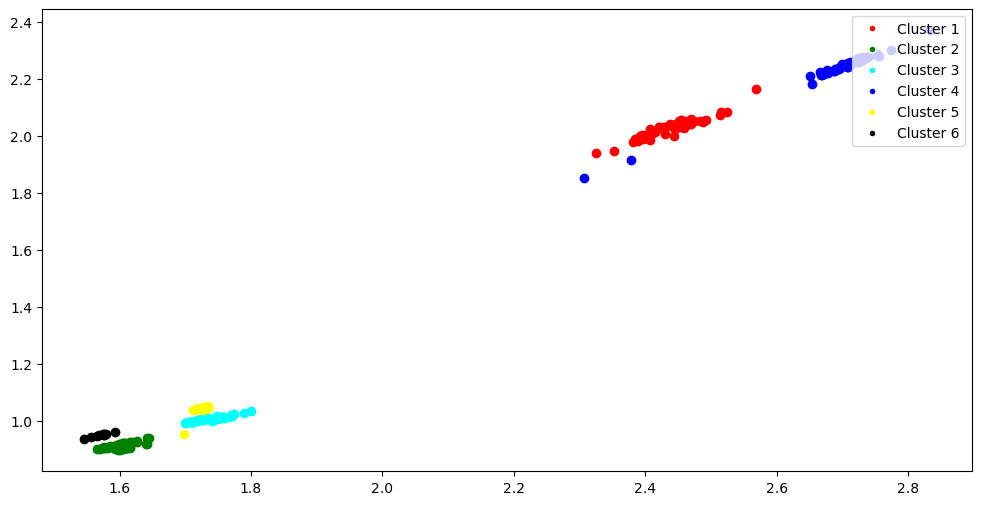

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f607d5188b0>
Traceback (most recent call last):
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function

  Cluster    Distribuição de Probabilidades
  c=3  [0. 0. 0. 1. 0. 0.]
  c=4  [0. 0. 0. 0. 1. 0.]
  c=0  [1. 0. 0. 0. 0. 0.]
  c=1  [0. 1. 0. 0. 0. 0.]
  c=5  [0. 0. 0. 0. 0. 1.]
  c=4  [0. 0. 0. 0. 1. 0.]
  c=4  [0. 0. 0. 0. 1. 0.]
  c=4  [0. 0. 0. 0. 1. 0.]
  c=2  [0. 0. 1. 0. 0. 0.]
  c=1  [0. 1. 0. 0. 0. 0.]


In [5]:
def gaussian_mixture(components):
    df = data.drop(["Label"],axis=1).copy()
    gmm = GaussianMixture(n_components=components)
    labels = gmm.fit_predict(df)
    frame = df.copy()
    frame['cluster'] = labels
    colors=['red','green','cyan','blue','yellow', 'black']
    plt.figure(figsize=(12,6))
    for k in range(0,components):
        df = frame[frame["cluster"]==k]
        plt.scatter(df["PKG"],df["CPU"],c=colors[k])

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.show()
    X = df[0:20]
    X = X.drop(columns=['cluster'])
    print("  Cluster    Distribuição de Probabilidades")
    a = gmm.fit_predict(X)
    b = gmm.predict_proba(X)
    i = 0
    for x in a:
        print("  c="+str(x)+"  "+str(b[i]))
        i += 1
        
gaussian_mixture(6)

DBSCAN(eps=5, min_samples=20)
Estimated number of clusters: 4
Estimated number of noise points: 5


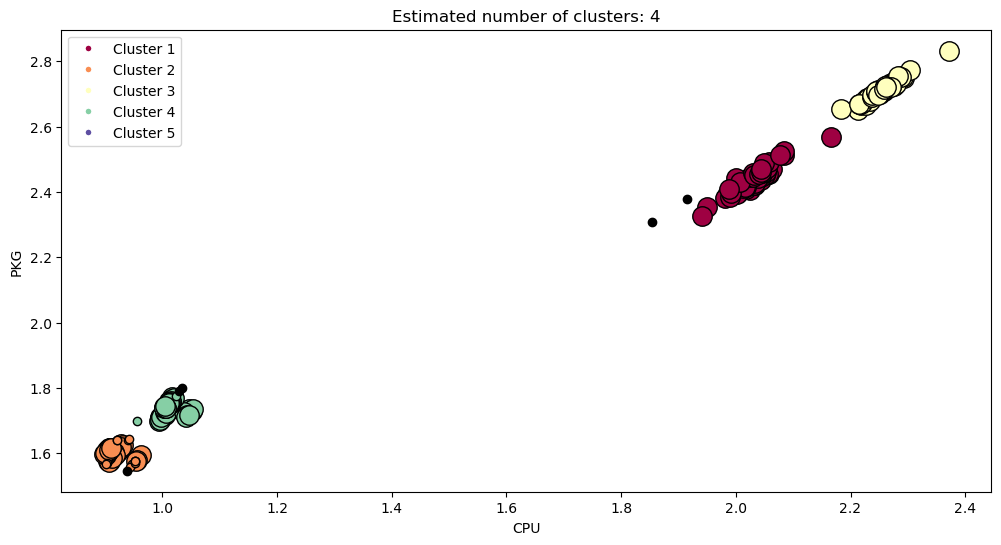

In [6]:
# Exemplo de uso do DBSCAN

def dbscan():
    df = data.copy()
    df = pd.get_dummies(df, columns=["Label"])

    # distance
    clust = DBSCAN(eps=5, min_samples=20).fit(df)
    labels = clust.labels_
    print(clust)


    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)


    X = np.array(df)
    #X = np.delete(X,3,1) # remove a coluna de 'cluster'

    plt.figure(figsize=(12,6))
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[clust.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    # create a list of legend elem
    ## markers / records
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                              label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) 
    for i, mcolor in enumerate(colors)]
    # plot legend
    plt.legend(handles=legend_elements, loc='upper left')
    plt.xlabel('CPU')
    plt.ylabel('PKG')

    plt.show()
    
dbscan()

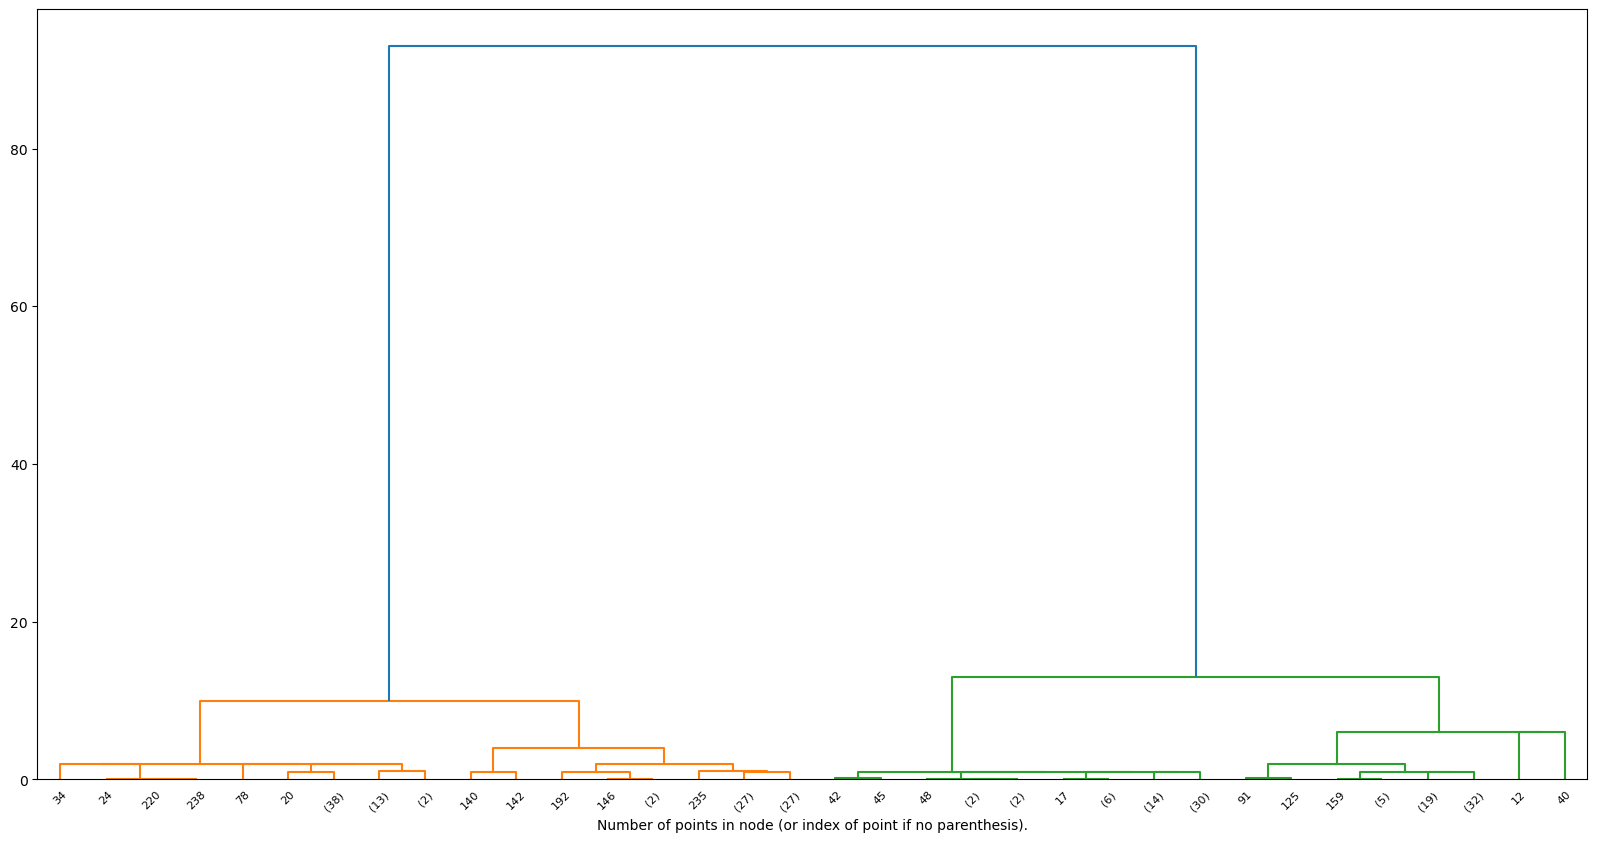

In [7]:
# Hierachical Clustering
def hierachical():
    df = data.copy()
    df.drop('Label',axis=1,inplace=True)
    link = linkage(df, method='single', metric='euclidean')
    plt.figure(figsize=(20,10))
    dendrogram(link,truncate_mode="level",p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
hierachical()

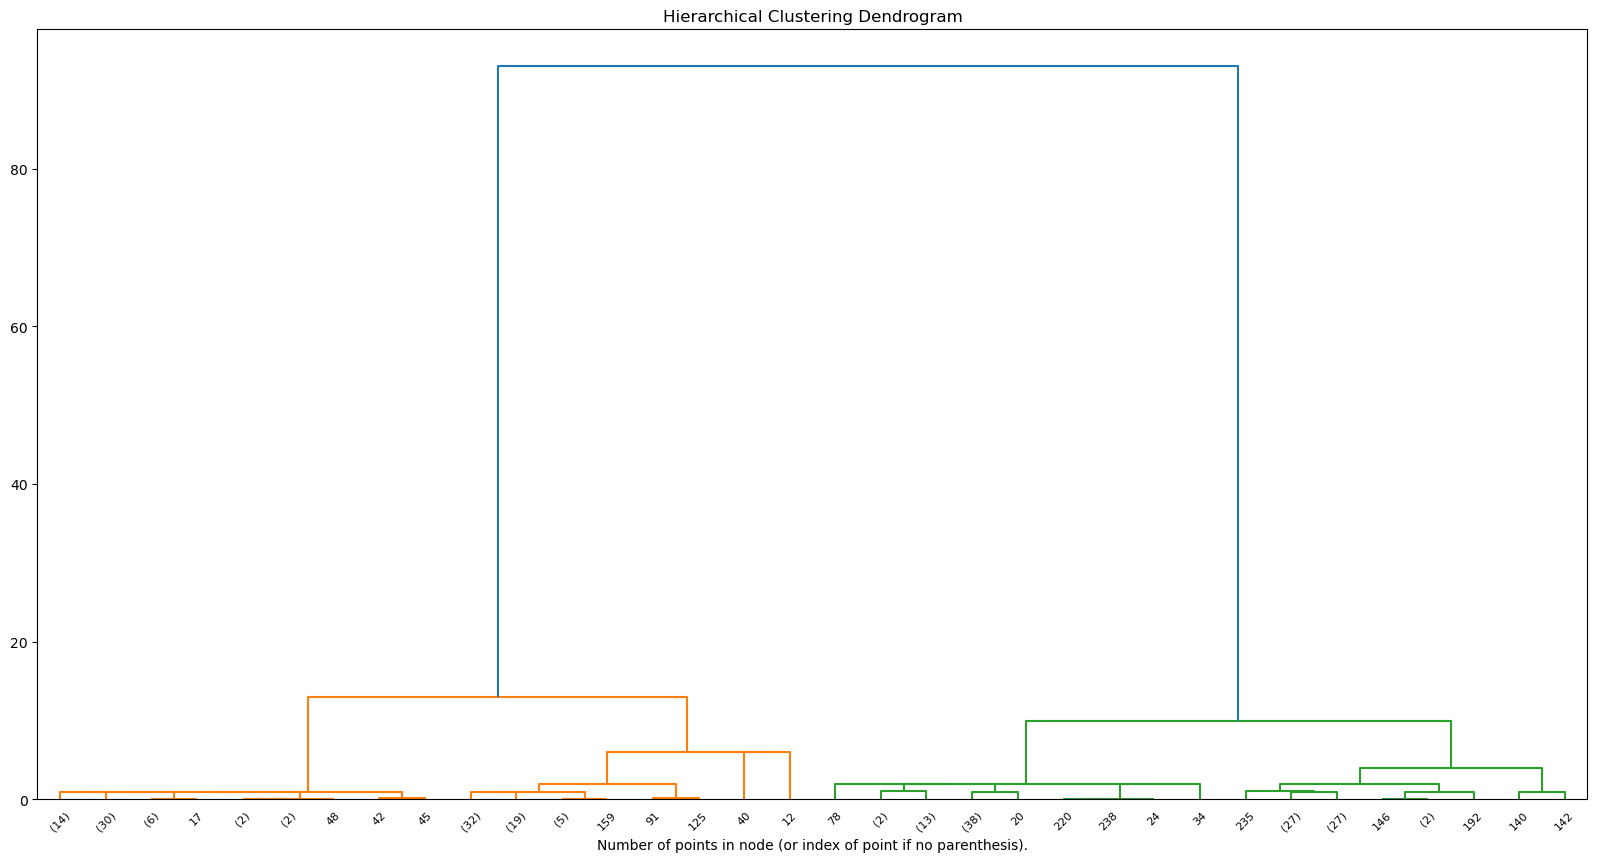

In [8]:
# Agglomerative Clustering (bottom-up construction)
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

def agglomerative():
    df = data.copy()
    df.drop('Label',axis=1,inplace=True)
    clustering = AgglomerativeClustering().fit(df)
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single',metric='euclidean')
    model = model.fit(df)
    plt.figure(figsize=(20,10))
    plt.title("Hierarchical Clustering Dendrogram")
    plot_dendrogram(model, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
agglomerative()